<a href="https://colab.research.google.com/github/2303A52242/Explainable-AI/blob/main/EX_AI_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4c6cec17a50c84cd6d2621114d7ad3fda7e2849805145fa49c11c144a7af361a
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [2]:
pip install pandas scikit-learn lime matplotlib seaborn

In [3]:
# Air Quality Prediction with LIME

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from lime.lime_tabular import LimeTabularExplainer

# 1. Load Dataset
# Replace with actual dataset path
try:
    df = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',')

    # Replace string 'nan' with actual NaN values in the entire DataFrame
    df.replace('nan', np.nan, inplace=True)


    # Drop columns with all NaNs and irrelevant columns
    df.dropna(axis=1, how='all', inplace=True)
    df = df.iloc[:, :15]  # Assume first 15 columns are relevant
    df = df.dropna()

    # Rename columns for easier access
    df.columns = [col.strip().replace(' ', '_') for col in df.columns]

    # Create binary label: safe if PM2.5 < 35, unsafe otherwise
    df['PM2.5'] = df['PM2.5'].astype(float) # Convert to float after handling 'nan' strings
    df['Label'] = df['PM2.5'].apply(lambda x: 'unsafe' if x > 35 else 'safe')

    # 2. Train Model
    X = df.drop(['Label'], axis=1)
    y = df['Label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # 3. Explain with LIME
    explainer = LimeTabularExplainer(X_train.values,
                                      feature_names=X.columns,
                                      class_names=['safe', 'unsafe'],
                                      discretize_continuous=True)

    i = 10  # Choose test instance
    exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=5)
    exp.show_in_notebook()

    # 4. Visualize Contributions
    fig = exp.as_pyplot_figure()
    plt.title("LIME Explanation for Air Quality Prediction")
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: 'AirQualityUCI.csv' not found. Please replace with the correct path to your dataset.")

Error: 'AirQualityUCI.csv' not found. Please replace with the correct path to your dataset.


In [4]:
pip install tensorflow lime matplotlib scikit-image

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.9175 - loss: 0.2676 - val_accuracy: 0.9808 - val_loss: 0.0694
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9863 - loss: 0.0451 - val_accuracy: 0.9833 - val_loss: 0.0593
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9872 - val_loss: 0.0464
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.9895 - val_loss: 0.0516
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9972 - loss: 0.0095 - val_accuracy: 0.9837 - val_loss: 0.0692
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9786 - loss: 0.0759
Test accuracy: 0.982699990272522


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

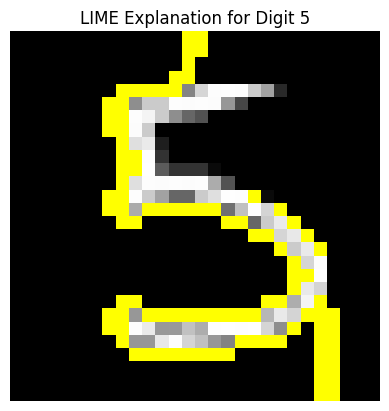

In [6]:
# MNIST Digit Classification with LIME

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from lime import lime_image
from skimage.segmentation import mark_boundaries

# 1. Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert grayscale to RGB by stacking the channel 3 times
X_train = np.stack((X_train,) * 3, axis=-1)
X_test = np.stack((X_test,) * 3, axis=-1)


# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 3)
X_test = X_test.reshape(-1, 28, 28, 3)


# 2. Train CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# 3. Apply LIME Image
explainer = lime_image.LimeImageExplainer()

idx = 15  # Index of the test image
image = X_test[idx]

explanation = explainer.explain_instance(image=image,
                                         classifier_fn=model.predict,
                                         top_labels=1,
                                         hide_color=0,
                                         num_samples=1000)

# 4. Visualize Regions
temp, mask = explanation.get_image_and_mask(label=explanation.top_labels[0],
                                            positive_only=True,
                                            num_features=10,
                                            hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))
plt.title(f"LIME Explanation for Digit {y_test[idx]}")
plt.axis('off')
plt.show()